In [5]:
import pandas as pd
import boto3
from boto3.dynamodb.conditions import Key
from decimal import Decimal


def read_dynamodb(table_name):
    dynamodb = boto3.resource('dynamodb')
    table = dynamodb.Table(table_name)

    response = table.scan()
    data = response['Items']

    while response.get('LastEvaluatedKey'):
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        data.extend(response['Items'])

    return data

# Convert data to DataFrame
df = pd.DataFrame(read_dynamodb('assignment_db'))

# Convert Decimal to float
df['profit'] = df['profit'].apply(float)
df['sale'] = df['sale'].apply(float)
df['price'] = df['price'].apply(float)

# Aggregate data by zone
agg_df = df.groupby('zone').agg({
    'profit': 'sum',
    'sale': 'sum',
    'price': 'sum'
})

# Calculate metrics for each zone
metrics = agg_df.agg({
    'profit': ['sum', 'mean', 'median', 'std'],
    'sale': ['sum', 'mean', 'median', 'std'],
    'price': ['sum', 'mean', 'median', 'std']
})

def get_metrics():
    return jsonify(metrics.to_dict())

print(metrics)


             profit        sale       price
sum     6429.000000  493.000000  695.000000
mean     428.600000   32.866667   46.333333
median   400.000000   30.000000   40.000000
std      237.852235   16.526458   26.690466


In [10]:
import pandas as pd
import boto3
from boto3.dynamodb.conditions import Key

def read_dynamodb(table_name):
    dynamodb = boto3.resource('dynamodb')
    table = dynamodb.Table(table_name)

    response = table.scan()
    data = response['Items']

    while response.get('LastEvaluatedKey'):
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        data.extend(response['Items'])

    return data

# Convert data to DataFrame
df = pd.DataFrame(read_dynamodb('assignment_db'))

# Get the mode of the 'zone' column
mode_zone = df['zone'].mode()

# Display the mode
print("Mode of 'zone':", mode_zone)



Mode of 'zone': 0    Street1   
1      Street2 
2       Women1 
Name: zone, dtype: object


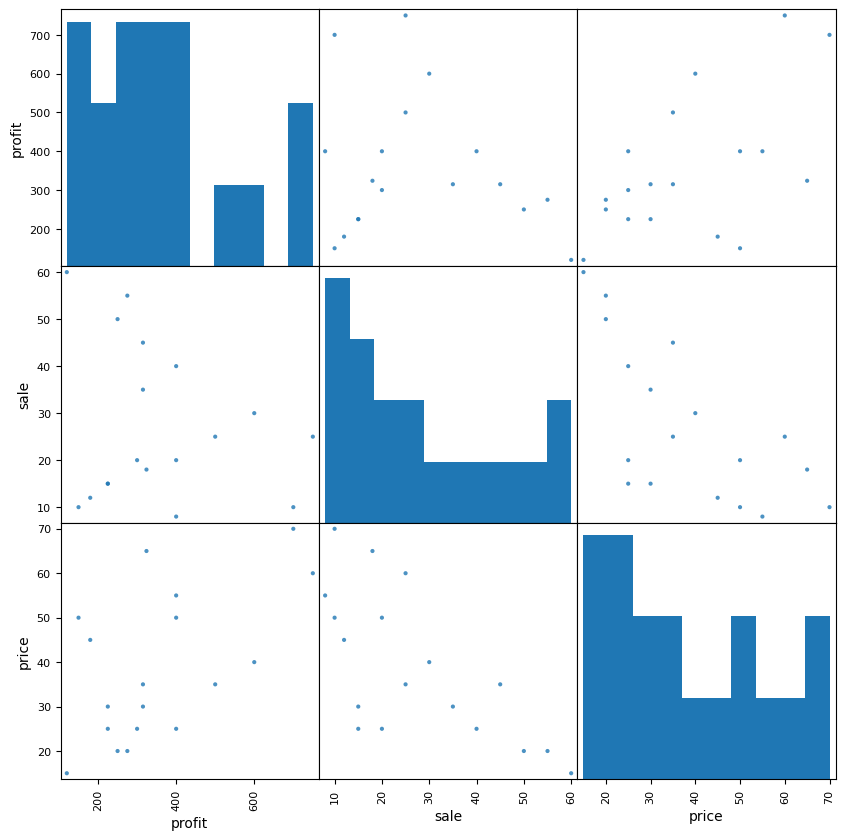

In [11]:
import pandas as pd
import boto3
from boto3.dynamodb.conditions import Key
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

def read_dynamodb(table_name):
    dynamodb = boto3.resource('dynamodb')
    table = dynamodb.Table(table_name)

    response = table.scan()
    data = response['Items']

    while response.get('LastEvaluatedKey'):
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        data.extend(response['Items'])

    return data

# Convert data to DataFrame
df = pd.DataFrame(read_dynamodb('assignment_db'))

# Convert Decimal to float
df['profit'] = df['profit'].apply(float)
df['sale'] = df['sale'].apply(float)
df['price'] = df['price'].apply(float)

# Create a scatterplot matrix
scatter_matrix(df[['profit', 'sale', 'price']], alpha=0.8, figsize=(10, 10), diagonal='hist')

# Show the plot
plt.show()


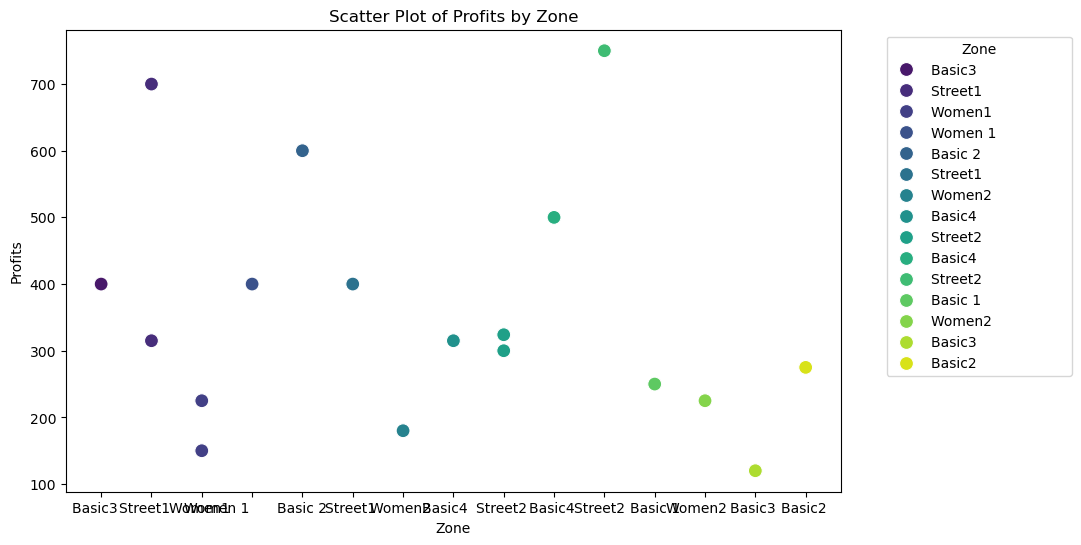

In [12]:
import pandas as pd
import boto3
from boto3.dynamodb.conditions import Key
import matplotlib.pyplot as plt
import seaborn as sns

def read_dynamodb(table_name):
    dynamodb = boto3.resource('dynamodb')
    table = dynamodb.Table(table_name)

    response = table.scan()
    data = response['Items']

    while response.get('LastEvaluatedKey'):
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        data.extend(response['Items'])

    return data

# Convert data to DataFrame
df = pd.DataFrame(read_dynamodb('assignment_db'))

# Convert Decimal to float
df['profit'] = df['profit'].apply(float)

# Create a scatter plot with different colors for each zone
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zone', y='profit', data=df, hue='zone', palette='viridis', s=100)
plt.title('Scatter Plot of Profits by Zone')
plt.xlabel('Zone')
plt.ylabel('Profits')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
